In [1]:
from scipy.io import loadmat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  #importing libraray
import math
import scipy.optimize as opt

In [2]:
i=0

def sigmoid(x):
    return 1 / (1 + np.exp(-x))  #sigmoid fn

def cost(theta,X,y):
   
    global i
   
    temp=X@theta 
    #computing cost
   
    predict=sigmoid(temp)
    predict[predict == 1] = 0.999
    temp1=(y.transpose()).dot(np.log(predict))
    temp2=(1-y.transpose()).dot(np.log(1-predict))
    temp=temp1+temp2

    cost=(-1/m)*np.sum(temp)
    if i%100==0:
        
        print("cost is ",cost)
    i+=1
    return cost    #returning cost

def cost_gradient(theta, X, y):
    
    #initial_theta is passed as theta and label is passed as y here
    #here theta is of size 401*1 and y is of size 5000*1
    m=len(y)
    temp=X@theta 
    predict=sigmoid(temp)
    predict[predict == 1] = 0.999
   
    predict=predict.reshape(y.shape)
   
    X4=(X.transpose())@(predict-y)
    X4=X4/m
    X4=X4.reshape((401,))
    return X4    #returning gradient
    
    

In [3]:
annots = loadmat('C:\\Users\\PRASHANT\\Desktop\\coding dec19\\file_neural\\ex3data1.mat')

In [4]:
annots

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [5]:
type(annots)

dict

In [6]:
XX=annots['X']
print(XX.shape,type(XX))
YY=annots['y']
print(YY.shape,type(YY))
np.place(YY, YY == 10, 0)

(5000, 400) <class 'numpy.ndarray'>
(5000, 1) <class 'numpy.ndarray'>


In [7]:
m,n=XX.shape
x0=np.ones([m,1])
X=x0
print(X.shape)

(5000, 1)


In [8]:
#here we take output all column one by one normalise it and then stack then together
# also we stack a column of one as first column
X=np.ones([m,1])  
div_normaliser=[]#we store factor by which divide each element of feature before passing to hypothesis
sub_normaliser=[] #we store factor by which substarct each element of feature before passing to hypothesis

#for normalisating each feature  we first substarct with mean then divide by standard deviation of each fature

for j in range(0,n):   # nth column will not be included there are n column in X 0 to n-1
    x1=XX[:,[j]]
    #print(x1)
    x1=np.array(x1)
    #print(x1)
    #sub_normaliser.append(x1.mean()) #soring for further
    #print("x1 mean is ",x1.mean())

   # x1=(x1-x1.mean())# substract each element with mean of that feature
    
    #div_normaliser.append(x1.std())#storing for further calculation
    #print("x1 standard deviation is ",x1.std())
    #x1=x1/x1.std()
     
    
    #print(x1.shape,type(x1))
    X=np.hstack([X,x1])   #one by one add all column

print(X.shape,type(X))

#we get n+1 column in input as column of ones is added


(5000, 401) <class 'numpy.ndarray'>


In [9]:

Y=np.array(YY)
print(Y.shape,type(Y))
print(X.shape,type(X))

(5000, 1) <class 'numpy.ndarray'>
(5000, 401) <class 'numpy.ndarray'>


In [10]:
n_label=10

print(X.shape)

print(type(X))

(5000, 401)
<class 'numpy.ndarray'>


In [11]:
classifiers = np.zeros([n_label,n+1])
#Y=Y.reshape((5000,))

for c in range(0,10):
    print(" y is ",c)
    label = (Y == c).astype(int)#label contain 1 if y==c otherwise 0 hence give theta for each n_label in one row of classifier
    initial_theta = np.zeros([n+1,1])
    
    
    classifiers[c, :] =opt.fmin_cg(cost, initial_theta, cost_gradient, (X, label), disp=0)
   
   
    
    
print("Training done") 
  

    

 y is  0
cost is  0.6931471805599447
cost is  0.007978437484480468
cost is  0.005129757985788318
cost is  0.0020195695991117243
cost is  0.0006873594503671741
cost is  0.00043920170619518264
cost is  0.00037018121952924404
cost is  0.0002781218503874877
 y is  1
cost is  0.016689012724794516
cost is  0.009523005782745822
cost is  0.004576421958871945
cost is  0.0025465036847610555
cost is  0.0004017093841562531
 y is  2
cost is  0.06887750122124037
cost is  0.052351732109478806
cost is  0.04614015776582368
cost is  0.0439354357143062
cost is  0.04200697836756283
cost is  0.04110154053108945
cost is  0.039195711115777326
cost is  0.03845688084702759
cost is  0.037949732391267914
cost is  0.03690610603072067
cost is  0.03631742056493389
cost is  0.035409443578162066
cost is  0.03452887838002017
cost is  0.034166493640632796
cost is  0.03380750196930495
cost is  0.03359293802876679
cost is  0.031009986675846108
cost is  0.030906150789806887
cost is  0.030698664028594693
cost is  0.0306104

cost is  0.05521635919667108
cost is  0.05519488251619354
cost is  0.05511947102024976
cost is  0.05510799395362179
cost is  0.05504451499495042
cost is  0.05497073813216627
cost is  0.05494554191790384
cost is  0.05489538972031464
cost is  0.05487704378150365
cost is  0.05481968110842421
cost is  0.0547913551050086
cost is  0.05476004743825138
cost is  0.054740413359273855
cost is  0.05472131441089615
cost is  0.05469191376464544
cost is  0.054672890498475846
cost is  0.05455864221065672
cost is  0.05454403591473262
Training done


In [12]:
print("classifiers shape is ")
print(classifiers.shape)
print(classifiers)

classifiers shape is 
(10, 401)
[[-1.87645770e+01  0.00000000e+00  0.00000000e+00 ... -5.03607544e-04
   2.25720540e-05  0.00000000e+00]
 [-5.79930781e+00  0.00000000e+00  0.00000000e+00 ...  2.62405327e-02
   2.59647528e-07  0.00000000e+00]
 [-8.37247801e+00  0.00000000e+00  0.00000000e+00 ...  3.69558842e-01
  -1.19481465e-02  0.00000000e+00]
 ...
 [-4.34756917e+00  0.00000000e+00  0.00000000e+00 ... -3.04764355e-01
   3.52338444e-02  0.00000000e+00]
 [-1.13778455e+01  0.00000000e+00  0.00000000e+00 ... -1.50831604e-02
   1.73280134e-03  0.00000000e+00]
 [-7.72634713e+00  0.00000000e+00  0.00000000e+00 ... -5.79889196e-02
   3.94020876e-03  0.00000000e+00]]


In [13]:
hypothesis=sigmoid(X@(classifiers.T))
output=np.argmax(hypothesis, axis=1)
print(output)
Y=Y.reshape((Y.shape[0],1))

[0 0 0 ... 9 9 9]


In [14]:
Y=Y.reshape((Y.shape[0],))
print("Training accuracy:", str(100 * np.mean(output == Y)) + "%")
print(output)
print(Y)

Training accuracy: 98.2%
[0 0 0 ... 9 9 9]
[0 0 0 ... 9 9 9]


In [15]:
print(Y[0])
print(output[0])

0
0


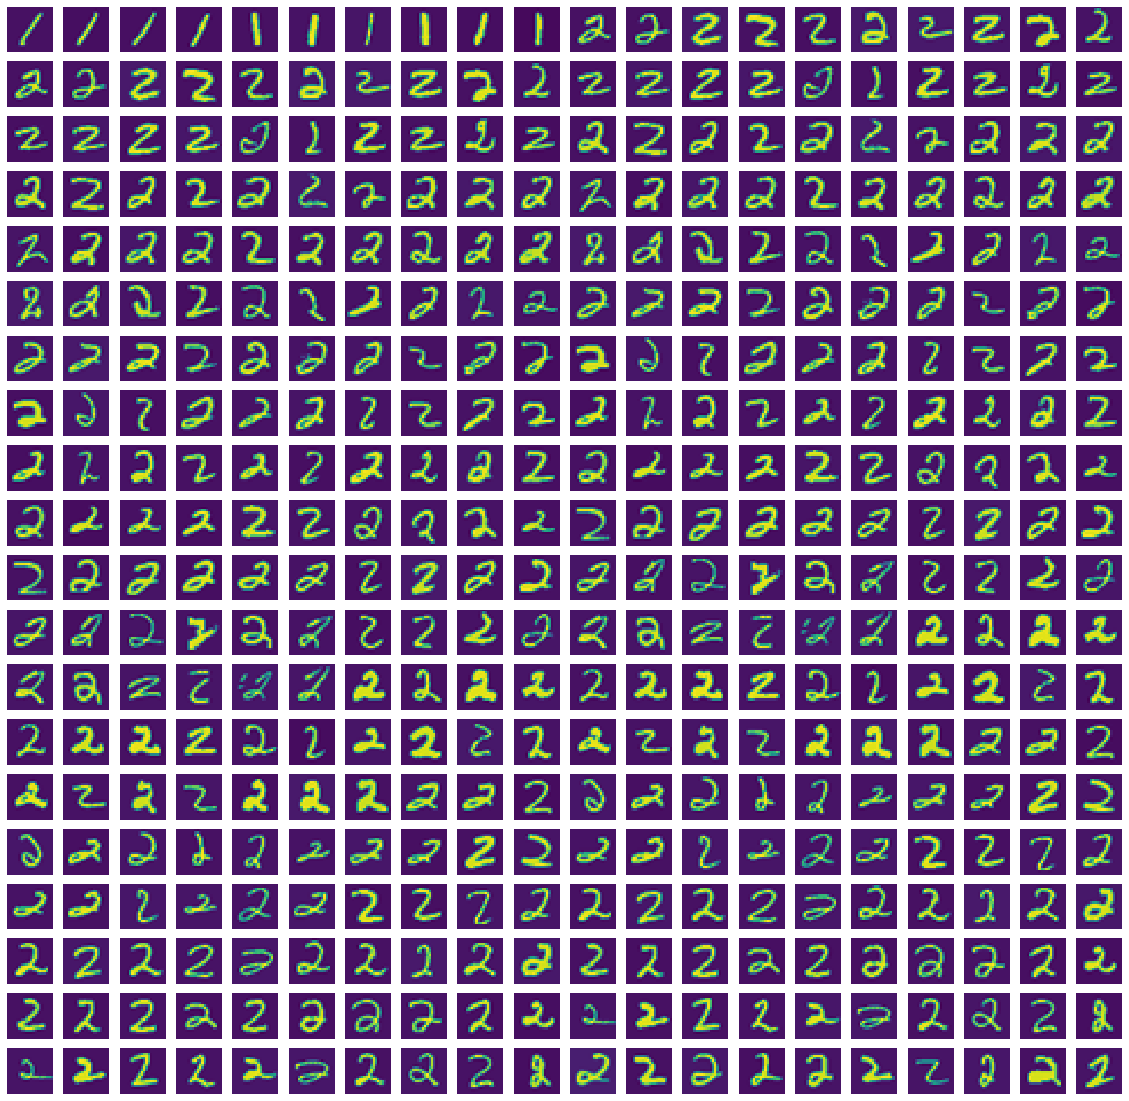

In [16]:
a=90
b=90 # we can change and b to see different part of number
_, axarr = plt.subplots(20,20,figsize=(20,20))
for i in range(a,a+20):
    for j in range(b,b+20):
       axarr[i-a,j-b].imshow(X[:,1:402][(i)*10+(j)].reshape((20,20), order = 'F'))          
       axarr[i-a,j-b].axis('off')   

In [17]:
print(Y[990])
print(output[990])
print(Y[1000])
print(output[1000])
print(Y[1010])
print(output[1010])
print(Y[1020])
print(output[1020])

1
1
2
2
2
2
2
2
